<a href="https://colab.research.google.com/github/AlekseevaTatiana23/Python_Libraries_for_DS/blob/main/ht2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
%ls


sample_data/       winequality-red.csv    world_happiness_report_2019.csv
winequality.names  winequality-white.csv  Семинар_1.ipynb


Используя датасет «World Happiness Report 2019», изучите взаимосвязи между различными факторами, которые влияют на уровень счастья в разных странах.

Задание 1: Анализ корреляции между ВВП на душу населения и оценкой счастья.
Используйте коэффициент Пирсона для определения взаимосвязи между ВВП на душу населения и оценками счастья.

Задание 2: Исследование влияния социальной поддержки на оценку счастья.
Примените коэффициент Спирмена для анализа отношений между социальной поддержкой и оценками счастья.

Задание 3: Взаимосвязь между продолжительностью здоровой жизни и оценками счастья.
Используйте коэффициент корреляции Кэнделла для изучения связи между ожидаемой продолжительностью здоровой жизни и уровнем счастья.

Задание 4: Свобода делать жизненный выбор и уровень счастья.
Проанализируйте, используя коэффициент корреляции Пирсона, как свобода делать жизненный выбор влияет на уровень счастья.

Вопросы для обсуждения:
Какой из факторов наиболее сильно связан с уровнем счастья в анализируемых странах? В чем может заключаться причина такой взаимосвязи?

In [54]:

import pandas as pd
import seaborn as sns; sns.set(style="whitegrid", palette="muted")
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, kendalltau

In [45]:
df = pd.read_csv('world_happiness_report_2019.csv', sep=",")


In [46]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [48]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


На основании предоставленных статистических данных по показателям стран мира можно сделать следующие аналитические выводы:

1. **Общий рейтинг (Overall rank):**  
   - Средний рейтинг составляет около 78,5, что указывает на среднюю позицию стран в глобальном рейтинге.  
   - Минимальное значение — 1, что соответствует самой высоко оцененной стране, а максимальное — 156 — самой низко оцененной.

2. **Score:**  
   - Среднее значение — примерно 5,41, с разбросом от 2,85 до 7,77.  
   - Большая часть стран (25% — около 4,54; 75% — около 6,18) имеют средний балл в диапазоне примерно 4,54 — 6,18, что говорит о среднем уровне общего «счастья» или оценки по выбранным критериям.

3. **Экономический фактор (GDP per capita):**  
   - Среднее — около 0,905, минимальное — 0, что указывает на наличие стран с очень низким уровнем ВВП на душу населения.  
   - Максимальное значение — 1,68, что свидетельствует о наличии стран с высоким уровнем дохода.  
   - Значение медианы (примерно 0,96) говорит о том, что большинство стран располагаются чуть выше среднего уровня доходов.

4. **Социальная поддержка (Social support):**  
   - Среднее значение — около 1,21, что указывает на хорошую поддержку в большинстве стран (максимум — 1,62).  
   - Минимум — 0, что означает отсутствие или очень слабую социальную поддержку у некоторых стран.

5. **Продолжительность здоровой жизни (Healthy life expectancy):**  
   - Среднее — примерно 0,73 (или около 73 лет при условии, что шкала идет от 0 до 1), с разбросом от 0 до 1.14 (что, возможно, связано с некорректными данными или шкалой).  
   - Половина стран имеют показатель в диапазоне 0,55 — 0,88, что говорит о достаточно высокой продолжительности здоровой жизни в большинстве стран.

6. **Свобода принимать жизненные решения (Freedom to make life choices):**  
   - Среднее значение — около 0,39, что говорит о умеренной свободе в большинстве стран.  
   - Максимум — 0,63, минимум — 0,00, что указывает на наличие стран с очень низкой свободой.

7. **Щедрость (Generosity):**  
   - Среднее — около 0,18, с разбросом до 0,57.  
   - Значения показывают, что в большинстве стран уровень щедрости умеренный, однако есть страны с очень низким уровнем.

8. **Восприятие коррупции (Perceptions of corruption):**  
   - Среднее — около 0,11, минимальное — 0, максимальное — 0,45.  
   - Это говорит о том, что в большинстве стран восприятие коррупции достаточно низкое, однако есть страны с более высоким уровнем.

**Общий вывод:**  
Большинство стран имеют средние показатели по всем ключевым аспектам качества жизни и счастья. Страны с более высокими рейтингами, как правило, демонстрируют выше средние показатели по ВВП, социальной поддержке и здоровью. В то же время встречаются страны с низкими значениями по большинству критериев, что указывает на значительные различия в уровне жизни и социально-экономических условиях.


In [50]:
df.select_dtypes(include='number').mean()

,0
Overall rank,78.500000
Score,5.407096
GDP per capita,0.905147
Social support,1.208814
Healthy life expectancy,0.725244
Freedom to make life choices,0.392571
Generosity,0.184846
Perceptions of corruption,0.110603


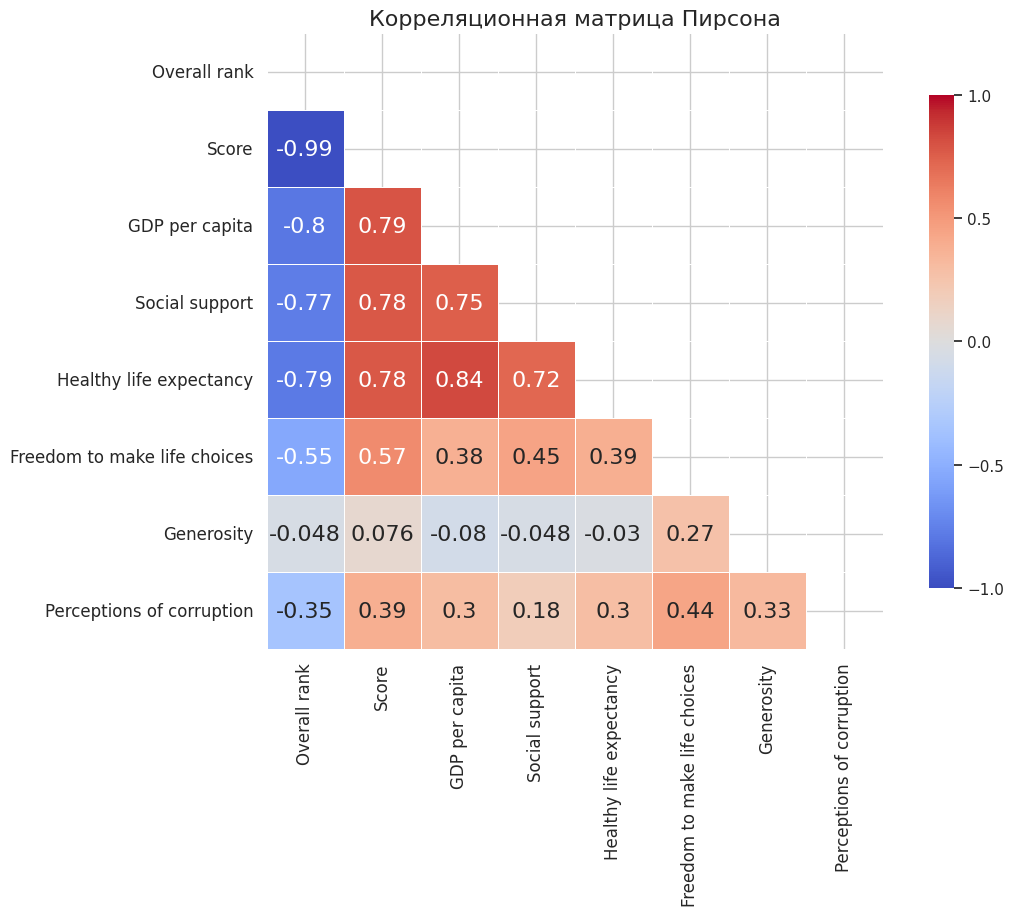

In [53]:
df_cont_features = df.drop(columns=['Country or region'])

corr = df_cont_features.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 8))

sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot_kws={"size": 16},
            cbar_kws={"shrink": 0.8, "orientation": "vertical", "ticks": [-1, -0.5, 0, 0.5, 1]})

plt.title('Корреляционная матрица Пирсона', size=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()



Первым, что бросается в глаза это набольший коэффициет корреляции наблюдается между ожидаемой здоровой продолжительностью жизни (Healthy life expectancy) и показатель ВВП на душу населения(GDP per capita), а так же уровнем социальной поддержки, который так же в свою очередь высоко колерирует с ВВП

Задание 1: Анализ корреляции между ВВП на душу населения и оценкой счастья. Используйте коэффициент Пирсона для определения взаимосвязи между ВВП на душу населения и оценками счастья.

In [62]:
correlation, p_value = pearsonr(df['Score'], df['GDP per capita'])
print(f'P-значение: {p_value:.4f}\n', f'Коэффициент корреляции Пирсона : {correlation:.3f}')

P-значение: 0.0000
 Коэффициент корреляции Пирсона : 0.794


Сильная положительная связь: Коэффициент 0.794 указывает на сильную положительную корреляцию между двумя переменными. Чем выше значение одной переменной, тем, как правило, выше и другая.

Статистическая значимость: P-значение, равное 0.0000, говорит о высокой статистической значимости этой корреляции. Обычно p-значения менее 0.05 считаются значимыми, следовательно, в вашем случае связь между переменными очень значима.

В целом, можно сказать, что существует статистически значимая сильная положительная зависимость между двумя изучаемыми переменными.

Задание 2: Исследование влияния социальной поддержки на оценку счастья. Примените коэффициент Спирмена для анализа отношений между социальной поддержкой и оценками счастья.

In [64]:
correlation, p_value = spearmanr(df['Score'], df['Social support'])
print(f'P-значение: {p_value:.4f}\n', f'Коэффициент корреляции Спирмена : {correlation:.3f}')

P-значение: 0.0000
 Коэффициент корреляции Спирмена : 0.816


Полученное значение коэффициента корреляции Спирмена составляет 0.816. Это указывает на сильную положительную корреляцию между социальной поддержкой и оценками счастья. Значение близкое к 1 свидетельствует о том, что более высокий уровень социальной поддержки связан с более высокими оценками счастья.
P-значение:

P-значение, полученное в результате тестирования, составляет 0.0000. Это значение значительно меньше установленного уровня значимости alpha = 0.05, что говорит о статистической значимости результатов.
Выводы:

Поскольку p-значение меньше 0.05, мы отвергаем нулевую гипотезу о том, что нет корреляционной связи между социальной поддержкой и оценками счастья.
Положительная корреляция (0.816) указывает на то, что страны с более высоким уровнем социальной поддержки, как правило, имеют более высокие оценки счастья. Это может быть связано с тем, что наличие поддержки от семьи, друзей и общества в целом способствует улучшению психоэмоционального состояния и общего качества жизни.

Задание 3: Взаимосвязь между продолжительностью здоровой жизни и оценками счастья. Используйте коэффициент корреляции Кэнделла для изучения связи между ожидаемой продолжительностью здоровой жизни и уровнем счастья.

In [65]:
correlation, p_value = kendalltau(df['Score'], df['Healthy life expectancy'])
print(f'P-значение: {p_value:.4f}\n', f'Коэффициент корреляции Кэнделла : {correlation:.3f}')

P-значение: 0.0000
 Коэффициент корреляции Кэнделла : 0.603


Коэффициент корреляции Кендалла:

Полученное значение коэффициента корреляции Кендалла составляет 0.603. Это значение указывает на умеренную положительную корреляцию между ожидаемой продолжительностью здоровой жизни и оценками счастья. Значение, близкое к 1, свидетельствует о том, что более высокая ожидаемая продолжительность здоровой жизни связана с более высокими оценками счастья.
P-значение:

P-значение, полученное в результате тестирования, составляет 0.0000, что значительно ниже установленного уровня значимости alpha = 0.05. Это говорит о статистической значимости полученных результатов.
Выводы:

Поскольку p-значение меньше 0.05, мы отвергаем нулевую гипотезу о том, что нет корреляционной связи между ожидаемой продолжительностью здоровой жизни и оценками счастья.
Положительная корреляция (0.603) указывает на то, что страны с более высокой ожидаемой продолжительностью здоровой жизни, как правило, имеют более высокие оценки счастья. Это может быть связано с тем, что здоровье и благополучие непосредственно влияют на общее качество жизни и удовлетворенность жизнью.

Задание 4: Свобода делать жизненный выбор и уровень счастья. Проанализируйте, используя коэффициент корреляции Пирсона, как свобода делать жизненный выбор влияет на уровень счастья.

In [66]:
correlation, p_value = pearsonr(df['Score'], df['Freedom to make life choices'])
print(f'P-значение: {p_value:.4f}\n', f'Коэффициент корреляции Пирсона : {correlation:.3f}')

P-значение: 0.0000
 Коэффициент корреляции Пирсона : 0.567


Коэффициент корреляции Пирсона:

Полученное значение коэффициента корреляции Пирсона составляет 0.567. Это значение указывает на умеренно сильную положительную корреляцию между свободой делать жизненный выбор и уровнем счастья. Это означает, что более высокая степень свободы в принятии жизненных решений связана с более высокими оценками счастья.
P-значение:

P-значение, полученное в результате тестирования, составляет 0.0000, что значительно ниже установленного уровня значимости alpha = 0.05. Это говорит о статистической значимости полученных результатов.
Выводы:

Поскольку p-значение меньше 0.05, мы отвергаем нулевую гипотезу о том, что нет корреляционной связи между свободой делать жизненный выбор и уровнем счастья.
Положительная корреляция (0.567) указывает на то, что люди, которые чувствуют себя более свободными в своих жизненных выборах, как правило, имеют более высокие уровни счастья. Это может быть связано с тем, что возможность принимать собственные решения и контролировать свою жизнь способствует повышению удовлетворенности и благополучия.